In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from numpy.random import default_rng


import sys
path_to_mavenn_local = '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_local'
sys.path.insert(0,path_to_mavenn_local)

import mavenn



In [2]:
!ls 20.08.16_mpsa_data/brca*

20.08.16_mpsa_data/brca2_lib1_rep1.csv 20.08.16_mpsa_data/brca2_lib2_rep1.csv
20.08.16_mpsa_data/brca2_lib1_rep2.csv 20.08.16_mpsa_data/brca2_lib2_rep2.csv
20.08.16_mpsa_data/brca2_lib1_rep3.csv 20.08.16_mpsa_data/brca2_lib2_rep3.csv


In [3]:
MPSA_data_lib1_rep1 = pd.read_csv('20.08.16_mpsa_data/brca2_lib1_rep1.csv')
MPSA_data_lib1_rep2 = pd.read_csv('20.08.16_mpsa_data/brca2_lib1_rep2.csv')
MPSA_data_lib1_rep3 = pd.read_csv('20.08.16_mpsa_data/brca2_lib1_rep3.csv')

MPSA_data_lib2_rep1 = pd.read_csv('20.08.16_mpsa_data/brca2_lib2_rep1.csv')
MPSA_data_lib2_rep2 = pd.read_csv('20.08.16_mpsa_data/brca2_lib2_rep2.csv')
MPSA_data_lib2_rep3 = pd.read_csv('20.08.16_mpsa_data/brca2_lib2_rep3.csv')


In [4]:
#MPSA_data_rep1.merge(MPSA_data_rep2,on='ss',how='outer').head()

In [5]:
#MPSA_data_rep1.head(3)

In [6]:
#MPSA_data_rep2.head(3)

In [7]:
#MPSA_data_rep3.head()

In [8]:
#len(MPSA_data_rep1),len(MPSA_data_rep2),len(MPSA_data_rep3)

### Redo merge as outer join and allow nans

In [9]:
# X = MPSA_data['ss'].values
# y = MPSA_data['log_psi'].values

# #MPSA_df = MPSA_data_rep1.merge(MPSA_data_rep2,on='ss').
# MPSA_df = MPSA_data_lib1_rep1.merge(MPSA_data_lib1_rep2,on='ss',how='outer')\
#                              .merge(MPSA_data_lib1_rep3,on='ss',how='outer')\
#                              .merge(MPSA_data_lib2_rep1,on='ss',how='outer')\
#                              .merge(MPSA_data_lib2_rep2,on='ss',how='outer')\
#                              .merge(MPSA_data_lib2_rep3,on='ss',how='outer')                    
            
    
#MPSA_df = MPSA_data_lib1_rep1.merge(MPSA_data_lib1_rep2,on='ss')
MPSA_df = MPSA_data_lib1_rep1.merge(MPSA_data_lib1_rep2,on='ss',how='outer') \
                             .merge(MPSA_data_lib1_rep3,on='ss',how='outer')\
                             .merge(MPSA_data_lib2_rep1,on='ss',how='outer')\
                             .merge(MPSA_data_lib2_rep2,on='ss',how='outer')\
                             .merge(MPSA_data_lib2_rep3,on='ss',how='outer')        

print(len(MPSA_df))                
MPSA_df.head()

26661


,ss,log_psi_x,dlog_psi_x,log_psi_y,dlog_psi_y,log_psi_x,dlog_psi_x,log_psi_y,dlog_psi_y,log_psi_x,dlog_psi_x,log_psi_y,dlog_psi_y
0,AAAGCAAAA,-3.751854,0.444200,-3.115981,0.404293,-2.690113,0.649725,-2.238407,0.463122,-2.900128,0.667861,-0.824806,0.194917
1,AAAGCAAAC,-2.697741,0.369972,-2.991176,0.552104,-1.690878,0.212487,-1.741498,0.834194,-4.394449,0.375559,-0.813106,0.274446
2,AAAGCAAAG,-2.242947,0.575121,-2.666159,0.413834,-1.716336,0.316662,-3.850148,0.751362,-4.934474,0.266520,-1.062409,0.279566
3,AAAGCAAAT,-3.067251,0.357014,-2.823078,0.343901,-1.837513,0.206056,-3.044522,0.680854,-5.493061,0.230119,-1.241713,0.151308
4,AAAGCAACA,-2.987074,0.472637,-2.489996,0.368131,-2.186586,0.266041,-2.619385,0.631789,-3.571543,0.748902,-1.351066,0.219278


In [10]:
MPSA_df.dropna(inplace=True)
print(len(MPSA_df))  

20700


In [11]:
MPSA_df.columns = ['ss', 'log_psi__lib_1_rep1', 'dlog_psi_x', 'log_psi__lib_1_rep2', 'dlog_psi_y', 'log_psi__lib_1_rep3',
       'dlog_psi_x', 'log_psi__lib_2_rep1', 'dlog_psi_y', 'log_psi__lib_2_rep2', 'dlog_psi_x',
       'log_psi__lib_2_rep3', 'dlog_psi_y']


In [12]:
X = MPSA_df['ss'].values
y1 = MPSA_df['log_psi__lib_1_rep1'].values
y2 = MPSA_df['log_psi__lib_1_rep2'].values
y3 = MPSA_df['log_psi__lib_1_rep3'].values

y4 = MPSA_df['log_psi__lib_2_rep1'].values
y5 = MPSA_df['log_psi__lib_2_rep2'].values
y6 = MPSA_df['log_psi__lib_2_rep3'].values

In [13]:
diag = np.linspace(min(y1),max(y1),100)

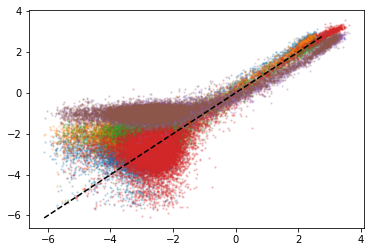

In [14]:
plt.scatter(y1,y2,s=2,alpha=0.2)
plt.scatter(y1,y3,s=2,alpha=0.2)
plt.scatter(y2,y3,s=2,alpha=0.2)

plt.scatter(y4,y5,s=2,alpha=0.2)
plt.scatter(y4,y6,s=2,alpha=0.2)
plt.scatter(y5,y6,s=2,alpha=0.2)

plt.plot(diag,diag,'--',color='black')
plt.show()

In [15]:
# y = np.hstack(
#     (y1.reshape(-1,1),
#      y2.reshape(-1,1),
#      y3.reshape(-1,1),
#      y4.reshape(-1,1),
#      y5.reshape(-1,1),
#      y6.reshape(-1,1)))

y = np.hstack(
    (y1.reshape(-1,1),
     y2.reshape(-1,1),
     y3.reshape(-1,1)))
#      y4.reshape(-1,1),
#      y5.reshape(-1,1),
#      y6.reshape(-1,1)))


In [16]:
y.shape

(20700, 3)

In [17]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
# Get sequence length
L = len(X[0])

# Define model
model = mavenn.Model(L=L,
                     alphabet='dna',
                     gpmap_type='additive', 
                     regression_type='Multi_y_GE',
                     ge_noise_model_type='SkewedT',
                     ge_heteroskedasticity_order=2,
                     #ge_nonlinearity_hidden_nodes=5,
                     number_of_replicate_targets = y_train.shape[1])

0 1
1 2
2 3


In [19]:
# Set training data
model.set_data(x=x_train,
               #y=[y_train[:,x] for x in range(y_train.shape[1])],
               y=y_train,
               #validation_flags=(data_df['set']=='validation'),
               shuffle=False)

N = 16,560 observations set as training data.
Using 20.4% for validation.
Time to set data: 0.0653 sec.


In [20]:
# Fit model to data
model.fit(learning_rate=.0005,
          epochs=1000,
          batch_size=100,
          early_stopping=True,
          early_stopping_patience=30,
          linear_initialization=False)

Epoch 1/1000
132/132 [==============================] - 6s 11ms/step - loss: 418.6893 - skewed_t_noise_model_layer_loss: 135.5314 - skewed_t_noise_model_layer_1_loss: 133.2497 - skewed_t_noise_model_layer_2_loss: 134.9634 - I_var: nan - val_loss: 384.6462 - val_skewed_t_noise_model_layer_loss: 123.3613 - val_skewed_t_noise_model_layer_1_loss: 125.2712 - val_skewed_t_noise_model_layer_2_loss: 122.1938 - val_I_var: nan
Epoch 2/1000
132/132 [==============================] - 0s 3ms/step - loss: 379.1388 - skewed_t_noise_model_layer_loss: 121.6388 - skewed_t_noise_model_layer_1_loss: 123.5904 - skewed_t_noise_model_layer_2_loss: 120.4479 - I_var: nan - val_loss: 362.5343 - val_skewed_t_noise_model_layer_loss: 116.1672 - val_skewed_t_noise_model_layer_1_loss: 118.5757 - val_skewed_t_noise_model_layer_2_loss: 115.3931 - val_I_var: nan
Epoch 3/1000
132/132 [==============================] - 0s 3ms/step - loss: 361.1967 - skewed_t_noise_model_layer_loss: 115.8377 - skewed_t_noise_model_layer_1

Epoch 21/1000
132/132 [==============================] - 0s 2ms/step - loss: 227.1311 - skewed_t_noise_model_layer_loss: 74.9379 - skewed_t_noise_model_layer_1_loss: 75.1920 - skewed_t_noise_model_layer_2_loss: 75.1673 - I_var: nan - val_loss: 225.5951 - val_skewed_t_noise_model_layer_loss: 74.4555 - val_skewed_t_noise_model_layer_1_loss: 74.6682 - val_skewed_t_noise_model_layer_2_loss: 74.6653 - val_I_var: nan
Epoch 22/1000
132/132 [==============================] - 0s 3ms/step - loss: 220.7611 - skewed_t_noise_model_layer_loss: 72.8422 - skewed_t_noise_model_layer_1_loss: 73.0679 - skewed_t_noise_model_layer_2_loss: 73.0525 - I_var: nan - val_loss: 225.0582 - val_skewed_t_noise_model_layer_loss: 74.2630 - val_skewed_t_noise_model_layer_1_loss: 74.4903 - val_skewed_t_noise_model_layer_2_loss: 74.4918 - val_I_var: nan
Epoch 23/1000
132/132 [==============================] - 0s 3ms/step - loss: 219.4835 - skewed_t_noise_model_layer_loss: 72.3931 - skewed_t_noise_model_layer_1_loss: 72.6

Epoch 41/1000
132/132 [==============================] - 0s 3ms/step - loss: 200.2481 - skewed_t_noise_model_layer_loss: 64.8705 - skewed_t_noise_model_layer_1_loss: 66.8934 - skewed_t_noise_model_layer_2_loss: 65.7129 - I_var: nan - val_loss: 209.0229 - val_skewed_t_noise_model_layer_loss: 67.7193 - val_skewed_t_noise_model_layer_1_loss: 69.8267 - val_skewed_t_noise_model_layer_2_loss: 68.6160 - val_I_var: nan
Epoch 42/1000
132/132 [==============================] - 0s 2ms/step - loss: 205.5749 - skewed_t_noise_model_layer_loss: 66.6042 - skewed_t_noise_model_layer_1_loss: 68.6589 - skewed_t_noise_model_layer_2_loss: 67.4249 - I_var: nan - val_loss: 207.6788 - val_skewed_t_noise_model_layer_loss: 67.2590 - val_skewed_t_noise_model_layer_1_loss: 69.3455 - val_skewed_t_noise_model_layer_2_loss: 68.0989 - val_I_var: nan
Epoch 43/1000
132/132 [==============================] - 0s 2ms/step - loss: 204.7969 - skewed_t_noise_model_layer_loss: 66.3647 - skewed_t_noise_model_layer_1_loss: 68.3

Epoch 61/1000
132/132 [==============================] - 0s 2ms/step - loss: 176.0214 - skewed_t_noise_model_layer_loss: 56.8667 - skewed_t_noise_model_layer_1_loss: 57.3300 - skewed_t_noise_model_layer_2_loss: 57.0002 - I_var: nan - val_loss: 187.2513 - val_skewed_t_noise_model_layer_loss: 60.6025 - val_skewed_t_noise_model_layer_1_loss: 61.0549 - val_skewed_t_noise_model_layer_2_loss: 60.7396 - val_I_var: nan
Epoch 62/1000
132/132 [==============================] - 0s 2ms/step - loss: 184.2621 - skewed_t_noise_model_layer_loss: 59.6239 - skewed_t_noise_model_layer_1_loss: 60.0630 - skewed_t_noise_model_layer_2_loss: 59.7106 - I_var: nan - val_loss: 186.9633 - val_skewed_t_noise_model_layer_loss: 60.5276 - val_skewed_t_noise_model_layer_1_loss: 60.9171 - val_skewed_t_noise_model_layer_2_loss: 60.6243 - val_I_var: nan
Epoch 63/1000
132/132 [==============================] - 0s 2ms/step - loss: 180.3883 - skewed_t_noise_model_layer_loss: 58.3304 - skewed_t_noise_model_layer_1_loss: 58.7

Epoch 81/1000
132/132 [==============================] - 0s 2ms/step - loss: 180.8603 - skewed_t_noise_model_layer_loss: 58.5895 - skewed_t_noise_model_layer_1_loss: 58.6325 - skewed_t_noise_model_layer_2_loss: 58.4551 - I_var: nan - val_loss: 185.3265 - val_skewed_t_noise_model_layer_loss: 60.0755 - val_skewed_t_noise_model_layer_1_loss: 60.1118 - val_skewed_t_noise_model_layer_2_loss: 59.9485 - val_I_var: nan
Epoch 82/1000
132/132 [==============================] - 0s 2ms/step - loss: 178.1304 - skewed_t_noise_model_layer_loss: 57.6739 - skewed_t_noise_model_layer_1_loss: 57.7205 - skewed_t_noise_model_layer_2_loss: 57.5460 - I_var: nan - val_loss: 185.5350 - val_skewed_t_noise_model_layer_loss: 60.1346 - val_skewed_t_noise_model_layer_1_loss: 60.1844 - val_skewed_t_noise_model_layer_2_loss: 60.0233 - val_I_var: nan
Epoch 83/1000
132/132 [==============================] - 0s 2ms/step - loss: 179.0610 - skewed_t_noise_model_layer_loss: 57.9886 - skewed_t_noise_model_layer_1_loss: 58.0

Epoch 101/1000
132/132 [==============================] - 0s 3ms/step - loss: 176.8249 - skewed_t_noise_model_layer_loss: 57.3084 - skewed_t_noise_model_layer_1_loss: 57.2025 - skewed_t_noise_model_layer_2_loss: 57.0863 - I_var: nan - val_loss: 184.3353 - val_skewed_t_noise_model_layer_loss: 59.8284 - val_skewed_t_noise_model_layer_1_loss: 59.6987 - val_skewed_t_noise_model_layer_2_loss: 59.5833 - val_I_var: nan
Epoch 102/1000
132/132 [==============================] - 0s 3ms/step - loss: 180.0302 - skewed_t_noise_model_layer_loss: 58.3852 - skewed_t_noise_model_layer_1_loss: 58.2682 - skewed_t_noise_model_layer_2_loss: 58.1524 - I_var: nan - val_loss: 184.6765 - val_skewed_t_noise_model_layer_loss: 59.9278 - val_skewed_t_noise_model_layer_1_loss: 59.8183 - val_skewed_t_noise_model_layer_2_loss: 59.7087 - val_I_var: nan
Epoch 103/1000
132/132 [==============================] - 0s 3ms/step - loss: 176.8134 - skewed_t_noise_model_layer_loss: 57.3122 - skewed_t_noise_model_layer_1_loss: 5

Epoch 121/1000
132/132 [==============================] - 0s 2ms/step - loss: 176.8813 - skewed_t_noise_model_layer_loss: 57.4034 - skewed_t_noise_model_layer_1_loss: 57.1939 - skewed_t_noise_model_layer_2_loss: 57.0908 - I_var: nan - val_loss: 183.5825 - val_skewed_t_noise_model_layer_loss: 59.6266 - val_skewed_t_noise_model_layer_1_loss: 59.4293 - val_skewed_t_noise_model_layer_2_loss: 59.3299 - val_I_var: nan
Epoch 122/1000
132/132 [==============================] - 0s 2ms/step - loss: 174.4090 - skewed_t_noise_model_layer_loss: 56.5780 - skewed_t_noise_model_layer_1_loss: 56.3664 - skewed_t_noise_model_layer_2_loss: 56.2713 - I_var: nan - val_loss: 183.4957 - val_skewed_t_noise_model_layer_loss: 59.5999 - val_skewed_t_noise_model_layer_1_loss: 59.3989 - val_skewed_t_noise_model_layer_2_loss: 59.3003 - val_I_var: nan
Epoch 123/1000
132/132 [==============================] - 0s 2ms/step - loss: 176.2451 - skewed_t_noise_model_layer_loss: 57.1984 - skewed_t_noise_model_layer_1_loss: 5

Epoch 141/1000
132/132 [==============================] - 0s 2ms/step - loss: 176.3315 - skewed_t_noise_model_layer_loss: 57.2675 - skewed_t_noise_model_layer_1_loss: 56.9889 - skewed_t_noise_model_layer_2_loss: 56.8973 - I_var: nan - val_loss: 182.7609 - val_skewed_t_noise_model_layer_loss: 59.4024 - val_skewed_t_noise_model_layer_1_loss: 59.1340 - val_skewed_t_noise_model_layer_2_loss: 59.0436 - val_I_var: nan
Epoch 142/1000
132/132 [==============================] - 0s 2ms/step - loss: 175.5840 - skewed_t_noise_model_layer_loss: 57.0060 - skewed_t_noise_model_layer_1_loss: 56.7433 - skewed_t_noise_model_layer_2_loss: 56.6562 - I_var: nan - val_loss: 182.8664 - val_skewed_t_noise_model_layer_loss: 59.4376 - val_skewed_t_noise_model_layer_1_loss: 59.1704 - val_skewed_t_noise_model_layer_2_loss: 59.0801 - val_I_var: nan
Epoch 143/1000
132/132 [==============================] - 0s 2ms/step - loss: 182.3440 - skewed_t_noise_model_layer_loss: 59.2811 - skewed_t_noise_model_layer_1_loss: 5

Epoch 161/1000
132/132 [==============================] - 0s 3ms/step - loss: 173.3311 - skewed_t_noise_model_layer_loss: 56.2906 - skewed_t_noise_model_layer_1_loss: 55.9668 - skewed_t_noise_model_layer_2_loss: 55.8799 - I_var: nan - val_loss: 182.1621 - val_skewed_t_noise_model_layer_loss: 59.2641 - val_skewed_t_noise_model_layer_1_loss: 58.8978 - val_skewed_t_noise_model_layer_2_loss: 58.8096 - val_I_var: nan
Epoch 162/1000
132/132 [==============================] - 0s 2ms/step - loss: 172.6486 - skewed_t_noise_model_layer_loss: 56.0490 - skewed_t_noise_model_layer_1_loss: 55.7406 - skewed_t_noise_model_layer_2_loss: 55.6647 - I_var: nan - val_loss: 182.4884 - val_skewed_t_noise_model_layer_loss: 59.3216 - val_skewed_t_noise_model_layer_1_loss: 59.0317 - val_skewed_t_noise_model_layer_2_loss: 58.9411 - val_I_var: nan
Epoch 163/1000
132/132 [==============================] - 0s 2ms/step - loss: 176.3988 - skewed_t_noise_model_layer_loss: 57.3216 - skewed_t_noise_model_layer_1_loss: 5

Epoch 181/1000
132/132 [==============================] - 0s 3ms/step - loss: 171.5695 - skewed_t_noise_model_layer_loss: 55.7420 - skewed_t_noise_model_layer_1_loss: 55.3494 - skewed_t_noise_model_layer_2_loss: 55.2618 - I_var: nan - val_loss: 181.7297 - val_skewed_t_noise_model_layer_loss: 59.1369 - val_skewed_t_noise_model_layer_1_loss: 58.7324 - val_skewed_t_noise_model_layer_2_loss: 58.6410 - val_I_var: nan
Epoch 182/1000
132/132 [==============================] - 0s 3ms/step - loss: 174.9805 - skewed_t_noise_model_layer_loss: 56.8919 - skewed_t_noise_model_layer_1_loss: 56.4790 - skewed_t_noise_model_layer_2_loss: 56.3934 - I_var: nan - val_loss: 182.0776 - val_skewed_t_noise_model_layer_loss: 59.2078 - val_skewed_t_noise_model_layer_1_loss: 58.8731 - val_skewed_t_noise_model_layer_2_loss: 58.7802 - val_I_var: nan
Epoch 183/1000
132/132 [==============================] - 0s 3ms/step - loss: 168.0790 - skewed_t_noise_model_layer_loss: 54.5542 - skewed_t_noise_model_layer_1_loss: 5

Epoch 201/1000
132/132 [==============================] - 0s 3ms/step - loss: 174.4403 - skewed_t_noise_model_layer_loss: 56.7419 - skewed_t_noise_model_layer_1_loss: 56.2656 - skewed_t_noise_model_layer_2_loss: 56.1767 - I_var: nan - val_loss: 181.0265 - val_skewed_t_noise_model_layer_loss: 58.9401 - val_skewed_t_noise_model_layer_1_loss: 58.4601 - val_skewed_t_noise_model_layer_2_loss: 58.3637 - val_I_var: nan
Epoch 202/1000
132/132 [==============================] - 0s 3ms/step - loss: 178.9325 - skewed_t_noise_model_layer_loss: 58.2280 - skewed_t_noise_model_layer_1_loss: 57.7660 - skewed_t_noise_model_layer_2_loss: 57.6770 - I_var: nan - val_loss: 181.0261 - val_skewed_t_noise_model_layer_loss: 58.9392 - val_skewed_t_noise_model_layer_1_loss: 58.4603 - val_skewed_t_noise_model_layer_2_loss: 58.3634 - val_I_var: nan
Epoch 203/1000
132/132 [==============================] - 0s 3ms/step - loss: 172.3021 - skewed_t_noise_model_layer_loss: 55.9993 - skewed_t_noise_model_layer_1_loss: 5

Epoch 221/1000
132/132 [==============================] - 0s 2ms/step - loss: 175.6264 - skewed_t_noise_model_layer_loss: 57.2120 - skewed_t_noise_model_layer_1_loss: 56.6035 - skewed_t_noise_model_layer_2_loss: 56.4933 - I_var: nan - val_loss: 180.7552 - val_skewed_t_noise_model_layer_loss: 58.8910 - val_skewed_t_noise_model_layer_1_loss: 58.3256 - val_skewed_t_noise_model_layer_2_loss: 58.2192 - val_I_var: nan
Epoch 222/1000
132/132 [==============================] - 0s 2ms/step - loss: 170.5857 - skewed_t_noise_model_layer_loss: 55.4807 - skewed_t_noise_model_layer_1_loss: 54.9401 - skewed_t_noise_model_layer_2_loss: 54.8415 - I_var: nan - val_loss: 180.6007 - val_skewed_t_noise_model_layer_loss: 58.8418 - val_skewed_t_noise_model_layer_1_loss: 58.2701 - val_skewed_t_noise_model_layer_2_loss: 58.1644 - val_I_var: nan
Epoch 223/1000
132/132 [==============================] - 0s 2ms/step - loss: 174.2022 - skewed_t_noise_model_layer_loss: 56.6908 - skewed_t_noise_model_layer_1_loss: 5

Epoch 241/1000
132/132 [==============================] - 0s 3ms/step - loss: 176.6594 - skewed_t_noise_model_layer_loss: 57.5588 - skewed_t_noise_model_layer_1_loss: 56.9130 - skewed_t_noise_model_layer_2_loss: 56.8033 - I_var: nan - val_loss: 179.8971 - val_skewed_t_noise_model_layer_loss: 58.6673 - val_skewed_t_noise_model_layer_1_loss: 57.9786 - val_skewed_t_noise_model_layer_2_loss: 57.8625 - val_I_var: nan
Epoch 242/1000
132/132 [==============================] - 0s 2ms/step - loss: 174.3370 - skewed_t_noise_model_layer_loss: 56.7968 - skewed_t_noise_model_layer_1_loss: 56.1339 - skewed_t_noise_model_layer_2_loss: 56.0178 - I_var: nan - val_loss: 180.2288 - val_skewed_t_noise_model_layer_loss: 58.7734 - val_skewed_t_noise_model_layer_1_loss: 58.0881 - val_skewed_t_noise_model_layer_2_loss: 57.9716 - val_I_var: nan
Epoch 243/1000
132/132 [==============================] - 0s 3ms/step - loss: 175.5065 - skewed_t_noise_model_layer_loss: 57.1875 - skewed_t_noise_model_layer_1_loss: 5

Epoch 261/1000
132/132 [==============================] - 0s 2ms/step - loss: 171.6501 - skewed_t_noise_model_layer_loss: 55.9836 - skewed_t_noise_model_layer_1_loss: 55.1618 - skewed_t_noise_model_layer_2_loss: 55.0262 - I_var: nan - val_loss: 179.1864 - val_skewed_t_noise_model_layer_loss: 58.5027 - val_skewed_t_noise_model_layer_1_loss: 57.6682 - val_skewed_t_noise_model_layer_2_loss: 57.5362 - val_I_var: nan
Epoch 262/1000
132/132 [==============================] - 0s 2ms/step - loss: 173.4426 - skewed_t_noise_model_layer_loss: 56.5131 - skewed_t_noise_model_layer_1_loss: 55.7819 - skewed_t_noise_model_layer_2_loss: 55.6625 - I_var: nan - val_loss: 179.2770 - val_skewed_t_noise_model_layer_loss: 58.5464 - val_skewed_t_noise_model_layer_1_loss: 57.6897 - val_skewed_t_noise_model_layer_2_loss: 57.5565 - val_I_var: nan
Epoch 263/1000
132/132 [==============================] - 0s 2ms/step - loss: 172.1257 - skewed_t_noise_model_layer_loss: 56.1486 - skewed_t_noise_model_layer_1_loss: 5

Epoch 281/1000
132/132 [==============================] - 0s 2ms/step - loss: 172.9385 - skewed_t_noise_model_layer_loss: 56.4647 - skewed_t_noise_model_layer_1_loss: 55.5242 - skewed_t_noise_model_layer_2_loss: 55.3670 - I_var: nan - val_loss: 179.5588 - val_skewed_t_noise_model_layer_loss: 58.7146 - val_skewed_t_noise_model_layer_1_loss: 57.7101 - val_skewed_t_noise_model_layer_2_loss: 57.5539 - val_I_var: nan
Epoch 282/1000
132/132 [==============================] - 0s 2ms/step - loss: 169.0255 - skewed_t_noise_model_layer_loss: 55.1995 - skewed_t_noise_model_layer_1_loss: 54.1965 - skewed_t_noise_model_layer_2_loss: 54.0420 - I_var: nan - val_loss: 178.5962 - val_skewed_t_noise_model_layer_loss: 58.3943 - val_skewed_t_noise_model_layer_1_loss: 57.3807 - val_skewed_t_noise_model_layer_2_loss: 57.2296 - val_I_var: nan
Epoch 283/1000
132/132 [==============================] - 0s 2ms/step - loss: 169.3515 - skewed_t_noise_model_layer_loss: 55.3503 - skewed_t_noise_model_layer_1_loss: 5

Epoch 301/1000
132/132 [==============================] - 0s 3ms/step - loss: 169.0524 - skewed_t_noise_model_layer_loss: 55.3283 - skewed_t_noise_model_layer_1_loss: 54.1064 - skewed_t_noise_model_layer_2_loss: 53.9051 - I_var: nan - val_loss: 178.6607 - val_skewed_t_noise_model_layer_loss: 58.4352 - val_skewed_t_noise_model_layer_1_loss: 57.3470 - val_skewed_t_noise_model_layer_2_loss: 57.1607 - val_I_var: nan
Epoch 302/1000
132/132 [==============================] - 0s 3ms/step - loss: 173.6942 - skewed_t_noise_model_layer_loss: 56.7808 - skewed_t_noise_model_layer_1_loss: 55.6925 - skewed_t_noise_model_layer_2_loss: 55.5071 - I_var: nan - val_loss: 177.8199 - val_skewed_t_noise_model_layer_loss: 58.2715 - val_skewed_t_noise_model_layer_1_loss: 57.0117 - val_skewed_t_noise_model_layer_2_loss: 56.8122 - val_I_var: nan
Epoch 303/1000
132/132 [==============================] - 0s 3ms/step - loss: 173.4328 - skewed_t_noise_model_layer_loss: 56.8999 - skewed_t_noise_model_layer_1_loss: 5

Epoch 321/1000
132/132 [==============================] - 0s 2ms/step - loss: 167.4557 - skewed_t_noise_model_layer_loss: 54.8605 - skewed_t_noise_model_layer_1_loss: 53.4850 - skewed_t_noise_model_layer_2_loss: 53.2380 - I_var: nan - val_loss: 177.0511 - val_skewed_t_noise_model_layer_loss: 58.1977 - val_skewed_t_noise_model_layer_1_loss: 56.6210 - val_skewed_t_noise_model_layer_2_loss: 56.3490 - val_I_var: nan
Epoch 322/1000
132/132 [==============================] - 0s 2ms/step - loss: 166.7104 - skewed_t_noise_model_layer_loss: 54.8190 - skewed_t_noise_model_layer_1_loss: 53.1539 - skewed_t_noise_model_layer_2_loss: 52.8532 - I_var: nan - val_loss: 176.6969 - val_skewed_t_noise_model_layer_loss: 58.0999 - val_skewed_t_noise_model_layer_1_loss: 56.4890 - val_skewed_t_noise_model_layer_2_loss: 56.2139 - val_I_var: nan
Epoch 323/1000
132/132 [==============================] - 0s 2ms/step - loss: 166.5538 - skewed_t_noise_model_layer_loss: 54.6563 - skewed_t_noise_model_layer_1_loss: 5

Epoch 341/1000
132/132 [==============================] - 0s 2ms/step - loss: 165.1768 - skewed_t_noise_model_layer_loss: 54.5390 - skewed_t_noise_model_layer_1_loss: 52.4805 - skewed_t_noise_model_layer_2_loss: 52.0792 - I_var: nan - val_loss: 176.0960 - val_skewed_t_noise_model_layer_loss: 58.1370 - val_skewed_t_noise_model_layer_1_loss: 56.1692 - val_skewed_t_noise_model_layer_2_loss: 55.7016 - val_I_var: nan
Epoch 342/1000
132/132 [==============================] - 0s 2ms/step - loss: 166.2481 - skewed_t_noise_model_layer_loss: 55.1273 - skewed_t_noise_model_layer_1_loss: 52.7814 - skewed_t_noise_model_layer_2_loss: 52.2454 - I_var: nan - val_loss: 175.2466 - val_skewed_t_noise_model_layer_loss: 57.9938 - val_skewed_t_noise_model_layer_1_loss: 55.7947 - val_skewed_t_noise_model_layer_2_loss: 55.3636 - val_I_var: nan
Epoch 343/1000
132/132 [==============================] - 0s 2ms/step - loss: 169.9382 - skewed_t_noise_model_layer_loss: 56.3190 - skewed_t_noise_model_layer_1_loss: 5

Epoch 361/1000
132/132 [==============================] - 0s 2ms/step - loss: 163.8597 - skewed_t_noise_model_layer_loss: 54.9452 - skewed_t_noise_model_layer_1_loss: 51.5198 - skewed_t_noise_model_layer_2_loss: 51.1574 - I_var: nan - val_loss: 173.3377 - val_skewed_t_noise_model_layer_loss: 57.8665 - val_skewed_t_noise_model_layer_1_loss: 54.7220 - val_skewed_t_noise_model_layer_2_loss: 54.5043 - val_I_var: nan
Epoch 362/1000
132/132 [==============================] - 0s 2ms/step - loss: 161.2424 - skewed_t_noise_model_layer_loss: 54.0162 - skewed_t_noise_model_layer_1_loss: 50.7016 - skewed_t_noise_model_layer_2_loss: 50.2832 - I_var: nan - val_loss: 172.6312 - val_skewed_t_noise_model_layer_loss: 57.8712 - val_skewed_t_noise_model_layer_1_loss: 54.3369 - val_skewed_t_noise_model_layer_2_loss: 54.1924 - val_I_var: nan
Epoch 363/1000
132/132 [==============================] - 0s 2ms/step - loss: 165.2309 - skewed_t_noise_model_layer_loss: 55.4491 - skewed_t_noise_model_layer_1_loss: 5

Epoch 381/1000
132/132 [==============================] - 0s 2ms/step - loss: 162.8034 - skewed_t_noise_model_layer_loss: 54.8747 - skewed_t_noise_model_layer_1_loss: 50.8681 - skewed_t_noise_model_layer_2_loss: 50.8666 - I_var: nan - val_loss: 173.3603 - val_skewed_t_noise_model_layer_loss: 57.7968 - val_skewed_t_noise_model_layer_1_loss: 54.6750 - val_skewed_t_noise_model_layer_2_loss: 54.6953 - val_I_var: nan
Epoch 382/1000
132/132 [==============================] - 0s 3ms/step - loss: 160.0797 - skewed_t_noise_model_layer_loss: 54.1105 - skewed_t_noise_model_layer_1_loss: 49.8907 - skewed_t_noise_model_layer_2_loss: 49.8838 - I_var: nan - val_loss: 172.4980 - val_skewed_t_noise_model_layer_loss: 57.8351 - val_skewed_t_noise_model_layer_1_loss: 54.2257 - val_skewed_t_noise_model_layer_2_loss: 54.2393 - val_I_var: nan
Epoch 383/1000
132/132 [==============================] - 0s 2ms/step - loss: 167.6685 - skewed_t_noise_model_layer_loss: 56.9506 - skewed_t_noise_model_layer_1_loss: 5

Epoch 401/1000
132/132 [==============================] - 0s 2ms/step - loss: 170.6696 - skewed_t_noise_model_layer_loss: 57.4030 - skewed_t_noise_model_layer_1_loss: 53.5219 - skewed_t_noise_model_layer_2_loss: 53.5383 - I_var: nan - val_loss: 173.2831 - val_skewed_t_noise_model_layer_loss: 57.6992 - val_skewed_t_noise_model_layer_1_loss: 54.6884 - val_skewed_t_noise_model_layer_2_loss: 54.6860 - val_I_var: nan
Epoch 402/1000
132/132 [==============================] - 0s 3ms/step - loss: 164.8136 - skewed_t_noise_model_layer_loss: 55.4913 - skewed_t_noise_model_layer_1_loss: 51.5572 - skewed_t_noise_model_layer_2_loss: 51.5606 - I_var: nan - val_loss: 172.5978 - val_skewed_t_noise_model_layer_loss: 57.5980 - val_skewed_t_noise_model_layer_1_loss: 54.3854 - val_skewed_t_noise_model_layer_2_loss: 54.4081 - val_I_var: nan
Epoch 403/1000
132/132 [==============================] - 0s 2ms/step - loss: 163.9648 - skewed_t_noise_model_layer_loss: 55.0665 - skewed_t_noise_model_layer_1_loss: 5

Epoch 421/1000
132/132 [==============================] - 0s 2ms/step - loss: 163.1314 - skewed_t_noise_model_layer_loss: 54.9726 - skewed_t_noise_model_layer_1_loss: 50.9695 - skewed_t_noise_model_layer_2_loss: 50.9675 - I_var: nan - val_loss: 171.9326 - val_skewed_t_noise_model_layer_loss: 57.4008 - val_skewed_t_noise_model_layer_1_loss: 54.1611 - val_skewed_t_noise_model_layer_2_loss: 54.1511 - val_I_var: nan
Epoch 422/1000
132/132 [==============================] - 0s 2ms/step - loss: 163.2038 - skewed_t_noise_model_layer_loss: 54.9743 - skewed_t_noise_model_layer_1_loss: 51.0153 - skewed_t_noise_model_layer_2_loss: 50.9893 - I_var: nan - val_loss: 172.1560 - val_skewed_t_noise_model_layer_loss: 57.4449 - val_skewed_t_noise_model_layer_1_loss: 54.2255 - val_skewed_t_noise_model_layer_2_loss: 54.2576 - val_I_var: nan
Epoch 423/1000
132/132 [==============================] - 0s 2ms/step - loss: 161.4796 - skewed_t_noise_model_layer_loss: 54.1321 - skewed_t_noise_model_layer_1_loss: 5

Epoch 441/1000
132/132 [==============================] - 0s 2ms/step - loss: 168.0445 - skewed_t_noise_model_layer_loss: 56.2923 - skewed_t_noise_model_layer_1_loss: 52.7646 - skewed_t_noise_model_layer_2_loss: 52.7471 - I_var: nan - val_loss: 172.7195 - val_skewed_t_noise_model_layer_loss: 57.3745 - val_skewed_t_noise_model_layer_1_loss: 54.5365 - val_skewed_t_noise_model_layer_2_loss: 54.5640 - val_I_var: nan
Epoch 442/1000
132/132 [==============================] - 0s 3ms/step - loss: 162.0994 - skewed_t_noise_model_layer_loss: 54.7309 - skewed_t_noise_model_layer_1_loss: 50.5560 - skewed_t_noise_model_layer_2_loss: 50.5690 - I_var: nan - val_loss: 172.4368 - val_skewed_t_noise_model_layer_loss: 57.3088 - val_skewed_t_noise_model_layer_1_loss: 54.4692 - val_skewed_t_noise_model_layer_2_loss: 54.4142 - val_I_var: nan
Epoch 443/1000
132/132 [==============================] - 0s 3ms/step - loss: 164.1618 - skewed_t_noise_model_layer_loss: 55.4216 - skewed_t_noise_model_layer_1_loss: 5

Epoch 461/1000
132/132 [==============================] - 0s 2ms/step - loss: 166.3575 - skewed_t_noise_model_layer_loss: 55.6937 - skewed_t_noise_model_layer_1_loss: 52.2009 - skewed_t_noise_model_layer_2_loss: 52.2004 - I_var: nan - val_loss: 171.6135 - val_skewed_t_noise_model_layer_loss: 57.0657 - val_skewed_t_noise_model_layer_1_loss: 54.1471 - val_skewed_t_noise_model_layer_2_loss: 54.1342 - val_I_var: nan
Epoch 462/1000
132/132 [==============================] - 0s 2ms/step - loss: 161.4497 - skewed_t_noise_model_layer_loss: 53.9330 - skewed_t_noise_model_layer_1_loss: 50.6282 - skewed_t_noise_model_layer_2_loss: 50.6223 - I_var: nan - val_loss: 171.8275 - val_skewed_t_noise_model_layer_loss: 57.1041 - val_skewed_t_noise_model_layer_1_loss: 54.2367 - val_skewed_t_noise_model_layer_2_loss: 54.2202 - val_I_var: nan
Epoch 463/1000
132/132 [==============================] - 0s 2ms/step - loss: 164.7600 - skewed_t_noise_model_layer_loss: 54.9891 - skewed_t_noise_model_layer_1_loss: 5

Epoch 481/1000
132/132 [==============================] - 0s 2ms/step - loss: 163.5222 - skewed_t_noise_model_layer_loss: 54.6129 - skewed_t_noise_model_layer_1_loss: 51.3025 - skewed_t_noise_model_layer_2_loss: 51.3094 - I_var: nan - val_loss: 171.9105 - val_skewed_t_noise_model_layer_loss: 56.9403 - val_skewed_t_noise_model_layer_1_loss: 54.3317 - val_skewed_t_noise_model_layer_2_loss: 54.3453 - val_I_var: nan
Epoch 482/1000
132/132 [==============================] - 0s 2ms/step - loss: 167.1805 - skewed_t_noise_model_layer_loss: 55.8967 - skewed_t_noise_model_layer_1_loss: 52.5098 - skewed_t_noise_model_layer_2_loss: 52.4797 - I_var: nan - val_loss: 172.1345 - val_skewed_t_noise_model_layer_loss: 56.8750 - val_skewed_t_noise_model_layer_1_loss: 54.4820 - val_skewed_t_noise_model_layer_2_loss: 54.4777 - val_I_var: nan
Epoch 483/1000
132/132 [==============================] - 0s 2ms/step - loss: 165.9558 - skewed_t_noise_model_layer_loss: 55.4634 - skewed_t_noise_model_layer_1_loss: 5

Epoch 501/1000
132/132 [==============================] - 0s 2ms/step - loss: 162.0117 - skewed_t_noise_model_layer_loss: 54.1465 - skewed_t_noise_model_layer_1_loss: 50.7723 - skewed_t_noise_model_layer_2_loss: 50.7620 - I_var: nan - val_loss: 172.2943 - val_skewed_t_noise_model_layer_loss: 56.7320 - val_skewed_t_noise_model_layer_1_loss: 54.6044 - val_skewed_t_noise_model_layer_2_loss: 54.6231 - val_I_var: nan
Epoch 502/1000
132/132 [==============================] - 0s 2ms/step - loss: 161.0708 - skewed_t_noise_model_layer_loss: 53.6400 - skewed_t_noise_model_layer_1_loss: 50.5458 - skewed_t_noise_model_layer_2_loss: 50.5507 - I_var: nan - val_loss: 171.5741 - val_skewed_t_noise_model_layer_loss: 56.5878 - val_skewed_t_noise_model_layer_1_loss: 54.3465 - val_skewed_t_noise_model_layer_2_loss: 54.3066 - val_I_var: nan
Epoch 503/1000
132/132 [==============================] - 0s 3ms/step - loss: 163.7936 - skewed_t_noise_model_layer_loss: 54.4688 - skewed_t_noise_model_layer_1_loss: 5

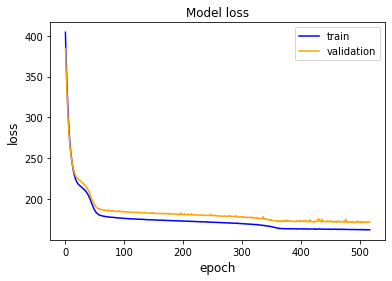

In [21]:
plt.plot(model.history['loss'], color='blue')
plt.plot(model.history['val_loss'], color='orange')
plt.title('Model loss', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.legend(['train', 'validation'])

In [22]:
from mavenn.src.utils import x_to_stats
stats = x_to_stats(x=x_test, alphabet=model.alphabet)
x_ohe_test = stats.pop('x_ohe')

In [23]:
#phi_test = model.x_to_phi(x_test)

In [24]:
model.get_nn().layers

In [25]:
import tensorflow as tf
import tensorflow.keras.backend as K


y_hat_functions = []
yhats = []

phi_function = K.function([model.get_nn().layers[0].input], [model.get_nn().layers[2].output])
phi_test = np.squeeze(phi_function(np.hstack([x_ohe_test,y_test])))

for _ in range(y_train.shape[1]):
    y_hat_functions.append(K.function([model.get_nn().layers[0].input], [model.get_nn().layers[2*_+3].output]))
    yhats.append(np.squeeze(y_hat_functions[_](np.hstack([x_ohe_test,y_test]))))

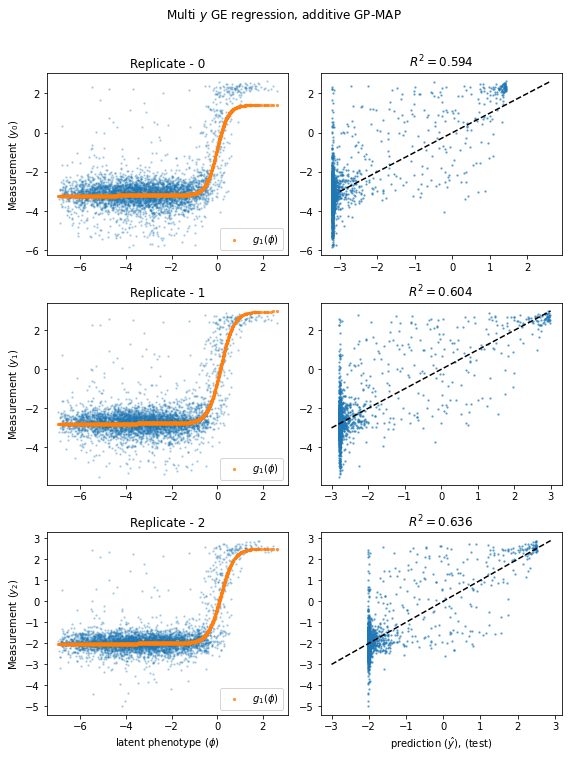

In [42]:
fig, ax = plt.subplots(y_train.shape[1],2,figsize=(8,10))

for _ in range(y_train.shape[1]):

    ax[_,0].set_title(f'Replicate - {_}')
    ax[_,0].scatter(phi_test,y_test[:,_], s=2,alpha=0.25)
    ax[_,0].scatter(phi_test,y_test[:,_].mean()+y_test[:,_].std()*yhats[_],s=5,alpha=0.75,label=f'$g_{1}(\phi)$')
    #ax[_,0].set_xlabel('latent phenotype $(\phi)$')
    ax[_,0].set_ylabel(f'Measurement $(y_{_})$')
    ax[_,0].legend()

    Rsq = np.corrcoef(y_test[:,_].mean()+y_test[:,_].std()*yhats[_],y_test[:,_])[0][1]**2
    ax[_,1].set_title('$R^2 = $' + str(Rsq)[0:5])
    ax[_,1].scatter(y_test[:,_].mean()+y_test[:,_].std()*yhats[_],y_test[:,_],s=2,alpha=0.5)
    #diag = np.linspace(min(y_test[:,_]),max(y_test[:,_]),100)
    diag = np.linspace(-3,max(y_test[:,_]),100)
    ax[_,1].plot(diag,diag,'--',color='black')

ax[_,0].set_xlabel('latent phenotype $(\phi)$')
ax[_,1].set_xlabel('prediction $(\hat y)$, (test)')
    
fig.suptitle('Multi $y$ GE regression, additive GP-MAP',y=1.05)    
fig.tight_layout()
fig.savefig('Multi_y_GE_regression_MPSA.png',bbox_inches='tight',dpi=300)

In [27]:
#tf.keras.utils.plot_model(model.get_nn(), show_shapes=True)